In [118]:
# Import packages needed for the notebook
import math
import pandas as pd
import seaborn as sns
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

In [119]:
df_signalP_predictions = pd.read_excel('../Data/01_SignalP_output/sigpep_predict.xlsx')

# Load CDS, Proteomics and SignalP datasets

In [120]:
# Define path to the CDS sequences
path_to_cds_file = '../Data/FungiDB-62_AoryzaeRIB40_AnnotatedCDSs.fasta'  

# Create an empty lists to hold annotated coding sequences (CDSs)
cds_seqrecords = []

# Open file with "with" statement to avoid problems with access 
with open(path_to_cds_file , mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # append the CDs into the empty list
        cds_seqrecords.append(record)

cds_seqrecords[:3]

[SeqRecord(seq=Seq('ATGCTAATCTCATCAGTGGCGAAGGATGGCTATGGGAAAGACATCTGGACCCTC...TAG'), id='AO090005000001-T', name='AO090005000001-T', description='AO090005000001-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr1_A_oryzae_RIB40:6423868-6424804(+) | length=937 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGACTTGTTGAGACTTCGCGATAGATCCCTGCTGGGCCAAGGCGCCCTTGTC...TGA'), id='AO090005000002-T', name='AO090005000002-T', description='AO090005000002-T | organism=Aspergillus_oryzae_RIB40 | product=Cytochrome P450 monooxygenase | location=Chr1_A_oryzae_RIB40:6420918-6422730(-) | length=1813 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCGATTGCCGCTGCAGTATCCAGTAATGACGTGCTCAAGGGCGTGCCCGAA...TAG'), id='AO090005000003-T', name='AO090005000003-T', description='AO090005000003-T | organism=Aspergillus_oryzae_RIB40 | product=Has domain(s) with predicted ATP binding, glucose binding, he

In [121]:
# Load the singalP dataset
df_signalP = pd.read_csv('../Data/04_Processed_data/signalP_processed.csv')

# Filter the acccessions which are 22 bp or shorter and isolate the top 25 values
df_signalP_filtered = df_signalP[df_signalP["length"] <= 22]
df_signalP_filtered = df_signalP_filtered.reset_index(drop=True)

df_signalP

,Accession,length,sequence
0,AO090005000016,23,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029,23,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042,23,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053,41,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059,18,MHLQATLAVGLSLLGLTL
...,...,...,...
1056,AO090103000483,19,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487,19,MTRYLSFLFLLILFGNSVF
1058,AO090103000493,17,MRGIVALSFLSVALGVT
1059,AO090701000994,18,MRLLLIAPLFSAVSYGAQ


In [122]:
# Load the proteomics dataset
df_proteomics = pd.read_csv('../Data/05_Data_analysis_signal_peptides/proteomics_mean_peptide_abundances.csv')
df_proteomics

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
863,AO090001000680,0.000000,0.309596,389.333333,0.309596,0.000000e+00,0.000000,9.818556e+04,0.000019


In [123]:
# Load the signalP-proteomics intersection
df_signalP_proteomics_intersection = pd.read_csv('../Data/05_Data_analysis_signal_peptides/proteomics_singalP_common_peptides.csv')
df_signalP_proteomics_intersection

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),length,sequence,max_abundance
0,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,20,MMVAWWSLFLYGLQVAAPAL,1.047763e+10
1,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,27,MEAFNLHNFLSSLYILLPFVILANPVH,1.494872e+09
2,AO090103000076,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,18,MLRVSAIFMACLLLATAA,1.202415e+09
3,AO090026000003,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,24,MAVRIARFLGLSTVAYLALANGID,1.061096e+09
4,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,24,MVSFSSCLRALALGSSVLAVQPVL,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
251,AO090701000844,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,24,MHILTPPRLCTALTVLTSLIISSF,0.000000e+00
252,AO090120000056,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,68,MPMPCRTQRYKYCFTVIVCLPYLHLTNFGYLKTNIIPHFSNPNHNS...,0.000000e+00
253,AO090009000017,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,20,MMTKLWMIFGCMAAAFSTAT,0.000000e+00
254,AO090023000365,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,18,MRDFLSLLGLASIIASSS,0.000000e+00


### Convert the datasets into SeqRecord files

In [124]:
# Create an empty list to hold matching SeqRecords
signalP_cds_seqrecords = []
# Loop through all SeqRecords in the dataset
for acc in df_signalP['Accession']:
    # Check if the ID matches one of the accessions
    for seqrecord in cds_seqrecords:
        # If there's a match and the sequence length is less than or equal to 6000
        if seqrecord.id.split('-')[0] == acc and len(seqrecord.seq) <= 6000:
            # Add the SeqRecord to the list
            signalP_cds_seqrecords.append(seqrecord)

print("Number of signalP-CDS match: ", len(signalP_cds_seqrecords))
signalP_cds_seqrecords[:3]

Number of signalP-CDS match:  1058


[SeqRecord(seq=Seq('ATGGCGCCCTCACACTCGTTTATGTTGTTTTTGTCTGTCATTTGTACCCACCTG...TAA'), id='AO090005000016-T', name='AO090005000016-T', description='AO090005000016-T | organism=Aspergillus_oryzae_RIB40 | product=Ortholog of A. fumigatus Af293 : Afu3g04050, A. niger CBS 513.88 : An16g00070, Neosartorya fischeri NRRL 181 : NFIA_006360 and Aspergillus clavatus NRRL 1 : ACLA_060700 | location=Chr1_A_oryzae_RIB40:6376515-6377810(+) | length=1296 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCATCTCCGCAACATAGTCATTGCACTGGCTGCGACTGCAGTGGCAAGCCCG...TAA'), id='AO090005000029-T', name='AO090005000029-T', description='AO090005000029-T | organism=Aspergillus_oryzae_RIB40 | product=Extracellular lipase (cutinase) with role in lipid degradation | location=Chr1_A_oryzae_RIB40:6352304-6353098(-) | length=795 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAAGGCCTCATTCATTTCTAGGCTGCTATCCCTGACAGCATTTGCGATCTCC...TGA'), id='AO09000

In [125]:
# Create an empty list to hold matching SeqRecords
proteomics_cds_seqrecords = []
# Loop through all SeqRecords in the dataset
for acc in df_proteomics['Accession']:
    # Check if the ID matches one of the accessions
    for seqrecord in cds_seqrecords:
        # If there's a match, add the SeqRecord to the list
        if seqrecord.id.split('-')[0] == acc and len(seqrecord.seq) <= 6000:
            # Add the SeqRecord to the list
            proteomics_cds_seqrecords.append(seqrecord)

print("Number of signalP-CDS match: ", len(proteomics_cds_seqrecords))
proteomics_cds_seqrecords[:3]

Number of signalP-CDS match:  862


[SeqRecord(seq=Seq('ATGGAGGCCTTCAATCTACACAACTTCCTTTCTTCCCTCTACATTCTTTTACCT...TAG'), id='AO090003000935-T', name='AO090003000935-T', description='AO090003000935-T | organism=Aspergillus_oryzae_RIB40 | product=Ortholog of A. fumigatus Af293 : Afu1g04130, Aspergillus flavus NRRL 3357 : AFL2T_02090 and Neosartorya fischeri NRRL 181 : NFIA_020600 | location=Chr2_A_oryzae_RIB40:4633280-4634206(-) | length=927 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGATGGTCGCGTGGTGGTCTCTATTTCTGTACGGCCTTCAGGTCGCGGCACCT...TGA'), id='AO090023000944-T', name='AO090023000944-T', description='AO090023000944-T | organism=Aspergillus_oryzae_RIB40 | product=Alpha-amylase | location=Chr3_A_oryzae_RIB40:2488464-2490507(-) | length=2044 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGATGGTCGCGTGGTGGTCTCTATTTCTGTACGGCCTTCAGGTCGCGGCACCT...TGA'), id='AO090003001591-T', name='AO090003001591-T', description='AO090003001591-T | organism=Aspe

In [126]:
# Create an empty list to hold matching SeqRecords
signalP_proteomics_intersection_cds_seqrecords = []
# Loop through all SeqRecords in the dataset
for acc in df_signalP_proteomics_intersection['Accession']:
    # Check if the ID matches one of the accessions
    for seqrecord in cds_seqrecords:
        # If there's a match, add the SeqRecord to the list
        if seqrecord.id.split('-')[0] == acc and len(seqrecord.seq) <= 6000:
            # Add the SeqRecord to the list
            signalP_proteomics_intersection_cds_seqrecords.append(seqrecord)

print("Number of signalP-CDS match: ", len(signalP_proteomics_intersection_cds_seqrecords))
signalP_proteomics_intersection_cds_seqrecords[:3]

Number of signalP-CDS match:  256


[SeqRecord(seq=Seq('ATGATGGTCGCGTGGTGGTCTCTATTTCTGTACGGCCTTCAGGTCGCGGCACCT...TGA'), id='AO090003001591-T', name='AO090003001591-T', description='AO090003001591-T | organism=Aspergillus_oryzae_RIB40 | product=Alpha-amylase involved in starch hydrolysis | location=Chr2_A_oryzae_RIB40:5385776-5387819(+) | length=2044 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGAGGCCTTCAATCTACACAACTTCCTTTCTTCCCTCTACATTCTTTTACCT...TAG'), id='AO090003000935-T', name='AO090003000935-T', description='AO090003000935-T | organism=Aspergillus_oryzae_RIB40 | product=Ortholog of A. fumigatus Af293 : Afu1g04130, Aspergillus flavus NRRL 3357 : AFL2T_02090 and Neosartorya fischeri NRRL 181 : NFIA_020600 | location=Chr2_A_oryzae_RIB40:4633280-4634206(-) | length=927 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCC...TGA'), id='AO090103000076-T', name='AO090103000076-T', description='AO

In [127]:
# Divide the SeqRecord files into small chunks as deeploc has a limit of 500 inputs
proteomics_cds_par1 = proteomics_cds_seqrecords[0:420]
proteomics_cds_par2 = proteomics_cds_seqrecords[420:]

signalP_cds_par1 = signalP_cds_seqrecords[0:400]
signalP_cds_par2 = signalP_cds_seqrecords[400:800]
signalP_cds_par3 = signalP_cds_seqrecords[800:]

# Check the size of each partition and if they add up to 1
all_proteomics_cds_partitions = [[proteomics_cds_par1]+[proteomics_cds_par2]]
all_signalP_cds_partitions = [[signalP_cds_par1]+[signalP_cds_par2]+[signalP_cds_par3]]

print("Proteomics-cds1: ", len(proteomics_cds_par1))
print("Proteomics-cds2: ", len(proteomics_cds_par2))
print("Proteomics-cds_all: ", len(all_proteomics_cds_partitions))
print("----------------------")
print("SignalP-cds1: ", len(signalP_cds_par1))
print("SignalP-cds2: ", len(signalP_cds_par2))
print("SignalP-cds3: ", len(signalP_cds_par3))
print("SignalP-cds_all: ", len(all_signalP_cds_partitions))

Proteomics-cds1:  420
Proteomics-cds2:  442
Proteomics-cds_all:  1
----------------------
SignalP-cds1:  400
SignalP-cds2:  400
SignalP-cds3:  258
SignalP-cds_all:  1


In [128]:
fasta_save = False # Change to "True" to save the fasta files
if fasta_save:
    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_proteomics_cds1.fasta", "w") as output_handle:
        SeqIO.write(proteomics_cds_par1, output_handle, "fasta")
    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_proteomics_cds2.fasta", "w") as output_handle:
        SeqIO.write(proteomics_cds_par2, output_handle, "fasta")

    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_signalP_cds1.fasta", "w") as output_handle:
        SeqIO.write(signalP_cds_par1, output_handle, "fasta")
    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_signalP_cds2.fasta", "w") as output_handle:
        SeqIO.write(signalP_cds_par2, output_handle, "fasta")
    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_signalP_cds3.fasta", "w") as output_handle:
        SeqIO.write(signalP_cds_par3, output_handle, "fasta")

    with open(f"../Data/Excess/Deeploc/Sigpep_for_deeploc/cdc_sequences/deeploc_signalP_proteomics_intersection_cds.fasta", "w") as output_handle:
        SeqIO.write(signalP_cds_par3, output_handle, "fasta")

# Concatenating the DeepLoc results

In [129]:
deeploc_concat = False
if deeploc_concat:
    # Load the first DeepLoc csv file into a DataFrame
    df_deeploc_proteomics_cds1 =pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_proteomics_cds1_results.csv')
    df_deeploc_proteomics_cds2 =pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_proteomics_cds2_results.csv')

    df_deeploc_signalP_cds1 =pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_cds1_results.csv')
    df_deeploc_signalP_cds2 =pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_cds2_results.csv')
    df_deeploc_signalP_cds3 =pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_cds3_results.csv')

    # Merge the data two dataframes
    df_deeploc_signalP_cds_concat = pd.concat([df_deeploc_signalP_cds1, df_deeploc_signalP_cds2, df_deeploc_signalP_cds3])
    df_deeploc_proteomics_cds_concat = pd.concat([df_deeploc_proteomics_cds1, df_deeploc_proteomics_cds2])

In [130]:
# Save the merged DataFrame to a new csv file
deeploc_save = False
if deeploc_save:
    df_deeploc_signalP_cds_concat.to_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_cds.csv', index=False)
    df_deeploc_proteomics_cds_concat.to_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_proteomics_cds.csv', index=False)

## Visualization of the CDS Deeploc analysis

In [131]:
# Load the Deeploc results for sigpep inpputs with the respective variable names
df_deeploc_signalP_sigpep = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/sigpep_sequences/deeploc_signalP_sigpep_all.csv')
df_deeploc_proteomics_sigpep = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/sigpep_sequences/deeploc_proteomics_sigpep_all.csv')
df_deeploc_signalP_proteomics_intersection_sigpep = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/sigpep_sequences/deeploc_signalP_proteomics_itersection_sigpep.csv')

# Rename the "Protein_ID" column as "Accession" to enable connection between Deeploc and original (Proteomics and SignalP) datasets 
df_deeploc_signalP_sigpep = df_deeploc_signalP_sigpep.rename(columns={'Protein_ID': 'Accession'})
df_deeploc_proteomics_sigpep  = df_deeploc_proteomics_sigpep.rename(columns={'Protein_ID': 'Accession'})
df_deeploc_signalP_proteomics_intersection_sigpep = df_deeploc_signalP_proteomics_intersection_sigpep.rename(columns={'Protein_ID': 'Accession'})

# Remove the suffix from the variables located in the "Accession" columns
df_deeploc_signalP_sigpep['Accession'] = df_deeploc_signalP_sigpep['Accession'].str.replace('-T-p1', '')
df_deeploc_proteomics_sigpep['Accession'] = df_deeploc_proteomics_sigpep['Accession'].str.replace('-T-p1', '')
df_deeploc_signalP_proteomics_intersection_sigpep['Accession'] = df_deeploc_signalP_proteomics_intersection_sigpep['Accession'].str.replace('-T-p1', '')

In [132]:
# Load the Deeploc results for CDS with the respective variable names
df_deeploc_signalP_cds = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_cds_all.csv')
df_deeploc_proteomics_cds = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_proteomics_cds_all.csv')
df_deeploc_signalP_proteomics_intersection_cds = pd.read_csv('../Data/Excess/Deeploc/Deeploc_results/cds_sequences/deeploc_signalP_proteomics_intersection_cds.csv')

# Rename the "Protein_ID" column as "Accession" to enable connection between Deeploc and original (Proteomics and SignalP) datasets 
df_deeploc_signalP_cds = df_deeploc_signalP_cds.rename(columns={'Protein_ID': 'Accession'})
df_deeploc_proteomics_cds  = df_deeploc_proteomics_cds.rename(columns={'Protein_ID': 'Accession'})
df_deeploc_signalP_proteomics_intersection_cds = df_deeploc_signalP_proteomics_intersection_cds.rename(columns={'Protein_ID': 'Accession'})

# Remove the suffix from the variables located in the "Accession" columns
df_deeploc_signalP_cds['Accession'] = df_deeploc_signalP_cds['Accession'].str.replace('-T', '')
df_deeploc_proteomics_cds['Accession'] = df_deeploc_proteomics_cds['Accession'].str.replace('-T', '')
df_deeploc_signalP_proteomics_intersection_cds['Accession'] = df_deeploc_signalP_proteomics_intersection_cds['Accession'].str.replace('-T', '')

In [133]:
# Check on of the variables to see if the dataframe changes are implemented
df_deeploc_signalP_proteomics_intersection_sigpep

,Accession,Localizations,Signals,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,AO090003000935,Extracellular,Signal peptide,0.1876,0.1641,0.5057,0.0668,0.3192,0.0222,0.1378,0.2121,0.1011,0.0134
1,AO090023000944,Mitochondrion,NaN,0.2653,0.3375,0.2206,0.1379,0.5486,0.0543,0.0680,0.0819,0.1021,0.0645
2,AO090003001591,Mitochondrion,NaN,0.2653,0.3375,0.2206,0.1379,0.5486,0.0543,0.0680,0.0819,0.1021,0.0645
3,AO090010000746,Extracellular|Mitochondrion,NaN,0.3184,0.1432,0.6632,0.0824,0.6792,0.0311,0.0469,0.0616,0.0482,0.1136
4,AO090026000003,Cytoplasm,Peroxisomal targeting signal,0.6236,0.3019,0.4384,0.0948,0.2176,0.1162,0.2265,0.1969,0.1774,0.3512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,AO090020000279,Extracellular,Signal peptide,0.2476,0.1021,0.6518,0.0548,0.4126,0.0430,0.1949,0.1539,0.1221,0.0093
252,AO090011000174,Extracellular,Signal peptide,0.1010,0.0741,0.9191,0.1092,0.2209,0.0292,0.0513,0.0812,0.0855,0.0188
253,AO090023000365,Extracellular,NaN,0.2505,0.0615,0.7285,0.0745,0.4647,0.0238,0.1049,0.1208,0.0867,0.0371
254,AO090010000562,Cytoplasm|Mitochondrion,NaN,0.4907,0.2887,0.3423,0.4389,0.6477,0.0225,0.0504,0.0768,0.0239,0.0258


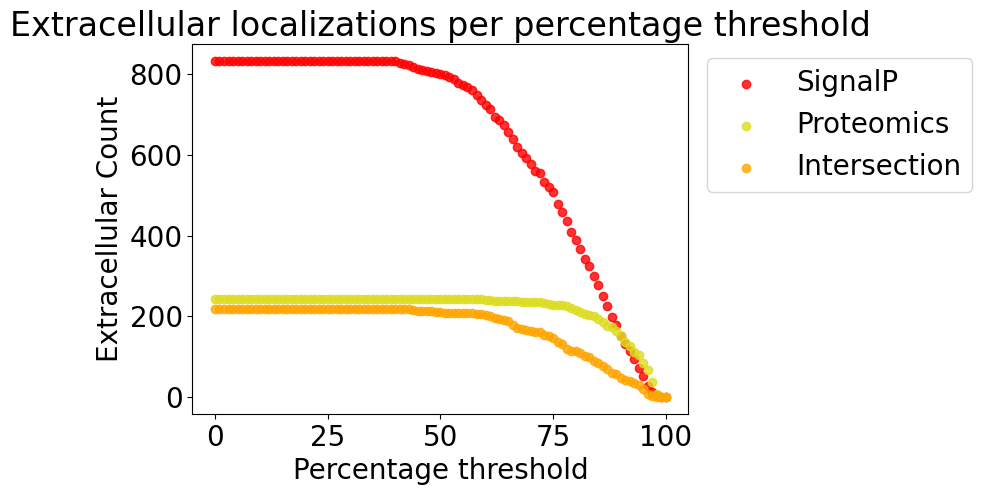

In [247]:
df1 = df_deeploc_signalP_sigpep
df2 = df_deeploc_proteomics_sigpep
df3 = df_deeploc_signalP_proteomics_intersection_sigpep


# Define the percentage limits
percentage_limits = range(0, 101)

# Initialize lists to store the percentage limit and the number of extracellular localizations
percentage_limit_values = []
extracellular_counts_df1 = []
extracellular_counts_df2 = []
extracellular_counts_df3 = []

# Iterate over the percentage limits
for limit in percentage_limits:
    # Filter the data based on the percentage limit for df1
    filtered_data_df1 = df1[df1['Extracellular'] >= limit / 100]
    # Count the number of rows with extracellular localizations for df1
    extracellular_count_df1 = len(filtered_data_df1[filtered_data_df1['Localizations'] == 'Extracellular'])
    
    filtered_data_df2 = df2[df2['Extracellular'] >= limit / 100]
    extracellular_count_df2 = len(filtered_data_df2[filtered_data_df2['Localizations'] == 'Extracellular'])

    filtered_data_df3 = df3[df3['Extracellular'] >= limit / 100]
    extracellular_count_df3 = len(filtered_data_df3[filtered_data_df3['Localizations'] == 'Extracellular'])
    
    # Append the values to the lists
    percentage_limit_values.append(limit)
    extracellular_counts_df1.append(extracellular_count_df1)
    extracellular_counts_df2.append(extracellular_count_df2)
    extracellular_counts_df3.append(extracellular_count_df3)

# Create dataframes from the lists
data_df1 = pd.DataFrame({'Percentage threshold': percentage_limit_values, 'Extracellular Count': extracellular_counts_df1})
data_df2 = pd.DataFrame({'Percentage threshold': percentage_limit_values, 'Extracellular Count': extracellular_counts_df2})
data_df3 = pd.DataFrame({'Percentage threshold': percentage_limit_values, 'Extracellular Count': extracellular_counts_df3})

# Generate the regression plots for each dataframe with different colors
sns.regplot(data=data_df1, x='Percentage threshold', y='Extracellular Count', color='red', label='SignalP', fit_reg=False)
sns.regplot(data=data_df2, x='Percentage threshold', y='Extracellular Count', color='#DCDC20', label='Proteomics', fit_reg=False)
sns.regplot(data=data_df3, x='Percentage threshold', y='Extracellular Count', color='orange', label='Intersection', fit_reg=False)

plt.xlabel('Percentage threshold')
plt.ylabel('Extracellular Count')
plt.title('Extracellular localizations per percentage threshold')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

plt.show()


In [155]:
# Filter the data where "Extracellular" is stated in the "Localizations" column
df1_filtered_data = df1[df1['Localizations'].str.contains('Extracellular', case=False, na=False)]
df2_filtered_data = df2[df2['Localizations'].str.contains('Extracellular', case=False, na=False)]
df3_filtered_data = df3[df3['Localizations'].str.contains('Extracellular', case=False, na=False)]

# Find the lowest value in the "Extracellular" column
df1_lowest_value = df1_filtered_data['Extracellular'].min()
df2_lowest_value = df2_filtered_data['Extracellular'].min()
df3_lowest_value = df3_filtered_data['Extracellular'].min()

print("Minimum threshold for 'Extracellular' localization in SignalP: {}".format(df1_lowest_value))
print("Minimum threshold for 'Extracellular' localization in Proteomics: {}".format(df2_lowest_value))
print("Minimum threshold for 'Extracellular' localization in Intersection: {}".format(df3_lowest_value))

Minimum threshold for 'Extracellular' localization in SignalP: 0.3975000083446502
Minimum threshold for 'Extracellular' localization in Proteomics: 0.5328999757766724
Minimum threshold for 'Extracellular' localization in Intersection: 0.4250999987125397


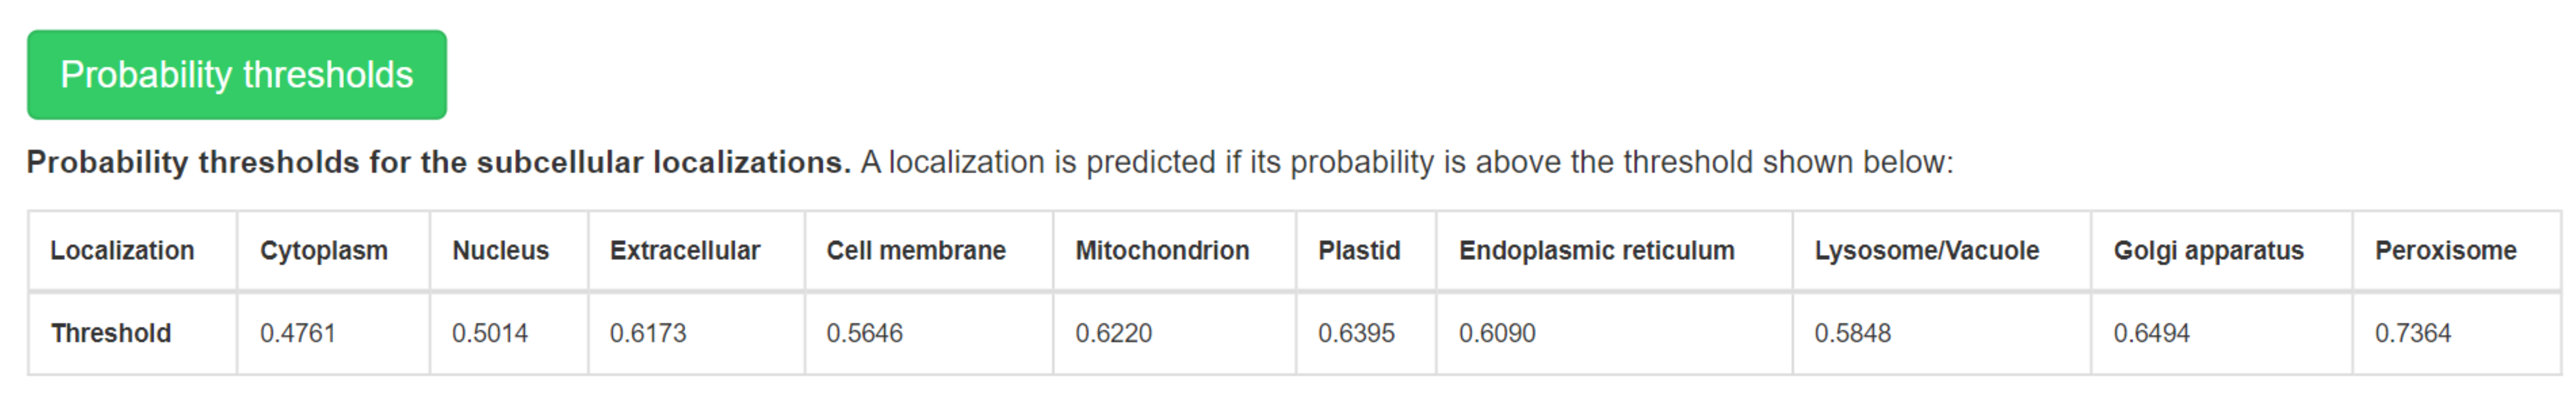

In [136]:
from PIL import Image
import IPython.display as display

# Lets display the DeepLoc 2.0 probability thresholds per localization stated in the server
image_path = "../Data/Excess/Deeploc/Deeploc_results/deeploc_threshold.png"
image = Image.open(image_path)

display.display(image)

In [248]:
# Select the accessions where "Extracellular" is above 0.95
df_extracellular_signalP_sigpep_95 = df_deeploc_signalP_sigpep[df_deeploc_signalP_sigpep['Extracellular'] > 0.95]
df_extracellular_proteomics_sigpep_95 = df_deeploc_proteomics_sigpep[df_deeploc_proteomics_sigpep['Extracellular'] > 0.95]
df_extracellular_signalP_proteomics_sigpep_95 = df_deeploc_signalP_proteomics_intersection_sigpep[df_deeploc_signalP_proteomics_intersection_sigpep['Extracellular'] > 0.95]

In [249]:
# Select the accessions where "Extracellular" is above server threshold ~0.62
df_extracellular_signalP_sigpep_61 = df_deeploc_signalP_sigpep[df_deeploc_signalP_sigpep['Extracellular'] > 0.62]
df_extracellular_proteomics_sigpep_61 = df_deeploc_proteomics_sigpep[df_deeploc_proteomics_sigpep['Extracellular'] > 0.62]
df_extracellular_signalP_proteomics_sigpep_61 = df_deeploc_signalP_proteomics_intersection_sigpep[df_deeploc_signalP_proteomics_intersection_sigpep['Extracellular'] > 0.62]

In [250]:
# Select the accessions where "Localization" was labelled "Extracellular" 
df_extracellular_signalP_sigpep = df_deeploc_signalP_sigpep[df_deeploc_signalP_sigpep['Localizations'] == 'Extracellular']
df_extracellular_proteomics_sigpep = df_deeploc_proteomics_sigpep[df_deeploc_proteomics_sigpep['Localizations'] == 'Extracellular']
df_extracellular_signalP_proteomics_sigpep = df_deeploc_signalP_proteomics_intersection_sigpep[df_deeploc_signalP_proteomics_intersection_sigpep['Localizations'] == 'Extracellular']

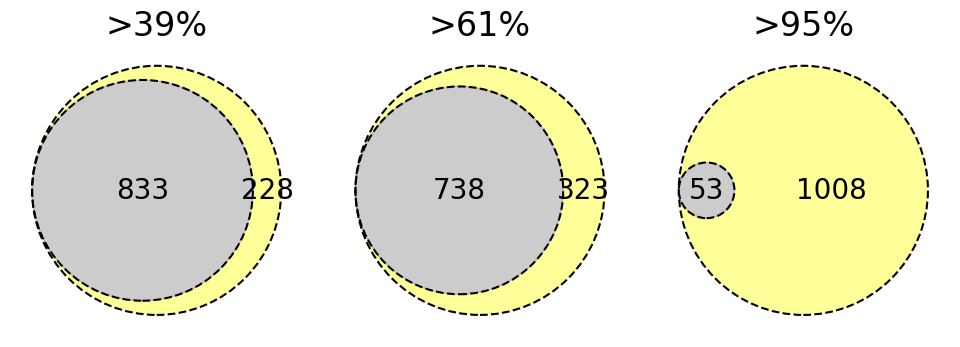

In [254]:
#  Create the Accession subsets
df_signalP_acc = set(df_signalP['Accession'])
df_extracellular_signalP_sigpep_acc = set(df_extracellular_signalP_sigpep['Accession'])
df_extracellular_signalP_sigpep_61_acc = set(df_extracellular_signalP_sigpep_61['Accession'])
df_extracellular_signalP_sigpep_95_acc = set(df_extracellular_signalP_sigpep_95['Accession'])

# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create the figure and two subplots
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Create the first Venn diagrams
subsets = [df_extracellular_signalP_sigpep_acc, df_signalP_acc]
v = venn2(subsets, set_labels=None, set_colors=('yellow', 'yellow'), ax=ax1)
v.get_label_by_id('10').set_text('')  # change the "number" label of the circle
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax1)
i = v.get_patch_by_id('11').set_color('grey') # change the intersection "i" color to grey
ax1.set_title(">39%")

subsets = [df_extracellular_signalP_sigpep_61_acc, df_signalP_acc]
v = venn2(subsets, set_labels=None, set_colors=('grey', 'yellow'), ax=ax2)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax2)
i = v.get_patch_by_id('11').set_color('grey')
ax2.set_title(">61%")

subsets = [df_extracellular_signalP_sigpep_95_acc, df_signalP_acc]
v = venn2(subsets, set_labels=None, set_colors=('grey', 'yellow'), ax=ax3)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax3)
i = v.get_patch_by_id('11').set_color('grey')
ax3.set_title(">95%")

plt.tight_layout()
plt.show()

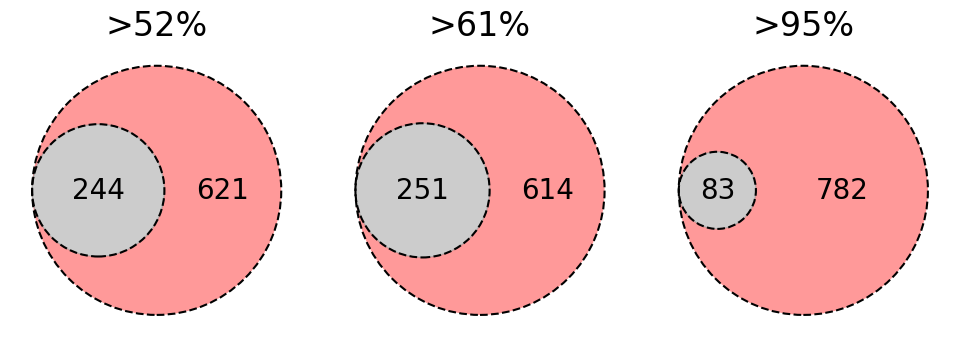

In [255]:
#  Create the Accession subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_extracellular_proteomics_sigpep_acc = set(df_extracellular_proteomics_sigpep['Accession'])
df_extracellular_proteomics_sigpep_61_acc = set(df_extracellular_proteomics_sigpep_61['Accession'])
df_extracellular_proteomics_sigpep_95_acc = set(df_extracellular_proteomics_sigpep_95['Accession'])

# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create the figure and two subplots
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Create the first Venn diagrams
subsets = [df_extracellular_proteomics_sigpep_acc, df_proteomics_acc]
v = venn2(subsets, set_labels=None, set_colors=('red', 'red'), ax=ax1)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax1)
i = v.get_patch_by_id('11').set_color('grey')
ax1.set_title(">52%")

subsets = [df_extracellular_proteomics_sigpep_61_acc, df_proteomics_acc]
v = venn2(subsets, set_labels=None, set_colors=('red', 'red'), ax=ax2)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax2)
i = v.get_patch_by_id('11').set_color('grey')
ax2.set_title(">61%")

subsets = [df_extracellular_proteomics_sigpep_95_acc, df_proteomics_acc]
v = venn2(subsets, set_labels=None, set_colors=('red', 'red'), ax=ax3)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax3)
i = v.get_patch_by_id('11').set_color('grey')
ax3.set_title(">95%")

plt.tight_layout()
plt.show()

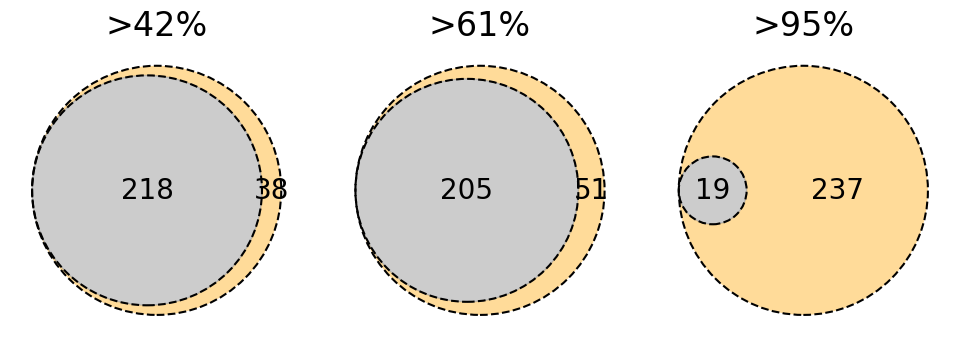

In [256]:
#  Create the Accession subsets
df_signalP_proteomics_intersection_acc = set(df_signalP_proteomics_intersection['Accession'])
df_extracellular_signalP_proteomics_sigpep_acc = set(df_extracellular_signalP_proteomics_sigpep['Accession'])
df_extracellular_signalP_proteomics_sigpep_61_acc = set(df_extracellular_signalP_proteomics_sigpep_61['Accession'])
df_extracellular_signalP_proteomics_sigpep_95_acc = set(df_extracellular_signalP_proteomics_sigpep_95['Accession'])

# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create the figure and two subplots
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Create the first Venn diagrams
subsets = [df_extracellular_signalP_proteomics_sigpep_acc, df_signalP_proteomics_intersection_acc]
v = venn2(subsets, set_labels=None, set_colors=('orange', 'orange'), ax=ax1)
v.get_label_by_id('10').set_text('')
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax1)
i = v.get_patch_by_id('11').set_color('grey')
ax1.set_title(">42%")

subsets = [df_extracellular_signalP_proteomics_sigpep_61_acc, df_signalP_proteomics_intersection_acc]
v = venn2(subsets, set_labels=None, set_colors=('orange', 'orange'), ax=ax2)
v.get_label_by_id('10').set_text('') 
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax2)
i = v.get_patch_by_id('11').set_color('grey') 
ax2.set_title(">61%")

subsets = [df_extracellular_signalP_proteomics_sigpep_95_acc, df_signalP_proteomics_intersection_acc]
v = venn2(subsets, set_labels=None, set_colors=('orange', 'orange'), ax=ax3)
v.get_label_by_id('10').set_text('') 
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.5, ax=ax3)
i = v.get_patch_by_id('11').set_color('grey')
ax3.set_title(">95%")

plt.tight_layout()
plt.show()